# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('week4.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace = True)
df['Upper Band'].fillna(0)
df['Lower Band'].fillna(0)
df.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,VWAP,Month,Year,Day_Perc_Change,Trend,signal,Bolinger,Upper Band,Lower Band
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-15,2017-05-15,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,509.450000,5,2017,0.000000,Slight or No change,0.0,509.450000,NaN,NaN
2017-05-16,2017-05-16,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,510.249582,5,2017,0.003631,Slight or No change,0.0,510.375000,512.991295,507.758705
2017-05-17,2017-05-17,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,508.495948,5,2017,-0.009681,Slight or No change,0.0,509.033333,514.035666,504.031001
2017-05-18,2017-05-18,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,500.779579,5,2017,-0.026563,Slight or No change,0.0,505.000000,521.642316,488.357684
2017-05-19,2017-05-19,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,500.222798,5,2017,0.009333,Slight or No change,0.0,503.500000,519.397327,487.602673


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [3]:
def select_buy(df):
    if df['Close Price'] < df['Lower Band']:
        return "Buy"
    if df['Close Price'] > df['Lower Band'] and df['Close Price'] < df['Bolinger']:
        return "Hold Buy/ Liquidate Short"
    if df['Close Price'] > df['Bolinger'] and df['Close Price'] < df['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if df['Close Price'] > df['Upper Band']:
        return "Short"

df = df.assign(Call = df.apply(select_buy, axis=1))
df = df[1:]
df.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,VWAP,Month,Year,Day_Perc_Change,Trend,signal,Bolinger,Upper Band,Lower Band,Call
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-16,2017-05-16,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,510.249582,5,2017,0.003631,Slight or No change,0.0,510.375000,512.991295,507.758705,Hold Short/ Liquidate Buy
2017-05-17,2017-05-17,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,508.495948,5,2017,-0.009681,Slight or No change,0.0,509.033333,514.035666,504.031001,Hold Buy/ Liquidate Short
2017-05-18,2017-05-18,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,500.779579,5,2017,-0.026563,Slight or No change,0.0,505.000000,521.642316,488.357684,Hold Buy/ Liquidate Short
2017-05-19,2017-05-19,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,500.222798,5,2017,0.009333,Slight or No change,0.0,503.500000,519.397327,487.602673,Hold Buy/ Liquidate Short
2017-05-22,2017-05-22,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,500.566573,5,2017,0.009749,Slight or No change,0.0,503.308333,517.558304,489.058363,Hold Buy/ Liquidate Short


# Fitting Classifier 

In [4]:
X = df[['Close Price', 'Bolinger', 'Upper Band', 'Lower Band']].values
y = df['Call'].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [5]:
#________________________________________Logistic Regression ________________________________________
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

train_acc_lr = model_lr.score(X_train, y_train)
test_acc_lr = model_lr.score(X_test,  y_test)
print(f'Train accuracy : {train_acc_lr} and test accuracy : {test_acc_lr}')

Train accuracy : 0.8096446700507615 and test accuracy : 0.8080808080808081


Since there is not much difference between train and test accuracy, so the model is not overfirring 

In [6]:
#________________________________________KNN ________________________________________
from sklearn.neighbors  import KNeighborsClassifier 
for k in range(1, 21):
  knn = KNeighborsClassifier(k, n_jobs = -1)
  model_knn = knn.fit(X_train, y_train)

  train_acc_knn = model_knn.score(X_train, y_train)
  test_acc_knn = model_knn.score(X_test,  y_test)
  print(f'Train accuracy : {train_acc_knn} and test accuracy : {test_acc_knn} for k = {k}')

Train accuracy : 1.0 and test accuracy : 0.8888888888888888 for k = 1
Train accuracy : 0.9137055837563451 and test accuracy : 0.8585858585858586 for k = 2
Train accuracy : 0.9289340101522843 and test accuracy : 0.8888888888888888 for k = 3
Train accuracy : 0.9060913705583756 and test accuracy : 0.8686868686868687 for k = 4
Train accuracy : 0.9060913705583756 and test accuracy : 0.8686868686868687 for k = 5
Train accuracy : 0.8857868020304569 and test accuracy : 0.8787878787878788 for k = 6
Train accuracy : 0.8705583756345178 and test accuracy : 0.8585858585858586 for k = 7
Train accuracy : 0.8553299492385786 and test accuracy : 0.8080808080808081 for k = 8
Train accuracy : 0.8527918781725888 and test accuracy : 0.7575757575757576 for k = 9
Train accuracy : 0.8324873096446701 and test accuracy : 0.7676767676767676 for k = 10
Train accuracy : 0.8274111675126904 and test accuracy : 0.7676767676767676 for k = 11
Train accuracy : 0.8121827411167513 and test accuracy : 0.7777777777777778 for

For KNN, with k = 6 is not over firring and giving pretty descent reulst, Logistic Regression gave even better results, so KNN won't be our final model


In [7]:
#________________________________________SVM________________________________________
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
model_svc = svc.fit(X_train, y_train)

train_acc_svc = model_svc.score(X_train, y_train)
test_acc_svc = model_svc.score(X_test,  y_test)
print(f'Train accuracy : {train_acc_svc} and test accuracy : {test_acc_svc}')

Train accuracy : 0.6903553299492385 and test accuracy : 0.6868686868686869


In [8]:
#________________________________________Decision Tree________________________________________
from sklearn import tree
tree = tree.DecisionTreeClassifier()
model_tree = tree.fit(X_train, y_train)

train_acc_tree = model_tree.score(X_train, y_train)
test_acc_tree = model_tree.score(X_test,  y_test)
print(f'Train accuracy : {train_acc_tree} and test accuracy : {test_acc_tree}')

Train accuracy : 1.0 and test accuracy : 0.8484848484848485


highly overfitting, so using random forest 

In [10]:
#________________________________________Random Forest________________________________________
from sklearn.ensemble import RandomForestClassifier
for n in [100, 200, 300, 400, 500, 1000]:
  for m in range(1, 26):
    rf = RandomForestClassifier(n_estimators = n, max_depth = m, random_state = 42)
    model_rf = rf.fit(X_train, y_train)

    train_acc_rf = model_rf.score(X_train, y_train)
    test_acc_rf = model_rf.score(X_test,  y_test)
    print(f'Train accuracy : {train_acc_rf} and test accuracy : {test_acc_rf}, for n = {n} and depth = {m}')

Train accuracy : 0.6091370558375635 and test accuracy : 0.6262626262626263, for n = 100 and depth = 1
Train accuracy : 0.7741116751269036 and test accuracy : 0.7777777777777778, for n = 100 and depth = 2
Train accuracy : 0.7817258883248731 and test accuracy : 0.7070707070707071, for n = 100 and depth = 3
Train accuracy : 0.8071065989847716 and test accuracy : 0.7777777777777778, for n = 100 and depth = 4
Train accuracy : 0.8527918781725888 and test accuracy : 0.8282828282828283, for n = 100 and depth = 5
Train accuracy : 0.8959390862944162 and test accuracy : 0.8484848484848485, for n = 100 and depth = 6
Train accuracy : 0.934010152284264 and test accuracy : 0.8484848484848485, for n = 100 and depth = 7
Train accuracy : 0.9543147208121827 and test accuracy : 0.8787878787878788, for n = 100 and depth = 8
Train accuracy : 0.9695431472081218 and test accuracy : 0.8787878787878788, for n = 100 and depth = 9
Train accuracy : 0.9873096446700508 and test accuracy : 0.8787878787878788, for n =

Highly overfitting for all cases 

In [13]:
#________________________________________for new dataset________________________________________
df_wipro = pd.read_csv('wipro_stock_data.csv')
df_wipro = df_wipro[df_wipro['Series'] == 'EQ']
df_wipro['Date'] = pd.to_datetime(df_wipro['Date'])
df_wipro.set_index(df_wipro.Date, inplace = True)
df_wipro.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-07-06,WIPRO,EQ,2017-07-06,257.80,257.8,260.05,255.85,256.5,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
2017-07-07,WIPRO,EQ,2017-07-07,257.75,255.1,258.25,255.00,257.1,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2017-07-10,WIPRO,EQ,2017-07-10,257.70,260.0,268.95,257.00,268.5,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
2017-07-11,WIPRO,EQ,2017-07-11,268.25,266.2,273.50,262.10,264.0,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
2017-07-12,WIPRO,EQ,2017-07-12,263.20,263.7,265.80,261.30,263.4,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46


In [14]:
# Using the Mindtree Data 
window = 20

# Calculate SMA taking 20 day window 
sma = df_wipro['Close Price'].rolling(window = window, min_periods = 1, center = False).mean()

# Calculate standard deviaton taking 20 day window 
std = df_wipro['Close Price'].rolling(window = window, min_periods = 1, center = False).std()

df_wipro['Bollinger'] = sma
df_wipro['Upper Band'] = df_wipro['Bollinger'] + 2 * std 
df_wipro['Lower Band'] = df_wipro['Bollinger'] - 2 * std 
df_wipro = df_wipro.dropna()

In [17]:
# Using Logistic Regression model
X = scalar.transform(df_wipro[['Close Price', 'Bollinger', 'Upper Band', 'Lower Band']])
df_wipro['Call predicted'] = model_lr.predict(X)

In [20]:
df_wipro.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger,Upper Band,Lower Band,Call predicted
Date,,,,,,,,,,,,,,,,,,,
2017-07-07,WIPRO,EQ,2017-07-07,257.75,255.1,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61,257.725000,257.795711,257.654289,Hold Short/ Liquidate Buy
2017-07-10,WIPRO,EQ,2017-07-10,257.70,260.0,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22,261.233333,273.386659,249.080007,Hold Short/ Liquidate Buy
2017-07-11,WIPRO,EQ,2017-07-11,268.25,266.2,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80,261.725000,271.841159,251.608841,Hold Short/ Liquidate Buy
2017-07-12,WIPRO,EQ,2017-07-12,263.20,263.7,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46,262.140000,271.095278,253.184722,Hold Short/ Liquidate Buy
2017-07-13,WIPRO,EQ,2017-07-13,263.80,263.9,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85,262.458333,270.618583,254.298084,Hold Short/ Liquidate Buy


### Query 4.2
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 

*   % change between Open and Close price for the day 
*   % change between Low and High price for the day 
*   % change between Low and High price for the day 
*   5 day rolling mean of the day to day % change in Close Price 
*   5 day rolling std of the day to day % change in Close Price



Create a new column 'Action' whose values are: 

*   1 if next day's price(Close) is greater than present day's. 
*   (-1) if next day's price(Close) is less than present day's. 
 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model.

In [80]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
wipro_data 

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05


In [81]:
wipro_data['%chg op_cl'] = ((wipro_data['Close Price'] - wipro_data ['Open Price'])/(wipro_data['Close Price']))*100
wipro_data['%chg lw_hg'] = ((wipro_data['Close Price'] - wipro_data ['High Price'])/(wipro_data['Low Price']))*100
wipro_data['%chg 5dymean'] = wipro_data['Close Price'].pct_change().dropna().rolling(5).mean()
wipro_data['%chg 5dystd'] = wipro_data['Close Price'].pct_change().dropna().rolling(5).std()
wipro_data = wipro_data.dropna()
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85,0.056807,-0.688468,0.005029,0.021852
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11,-1.654801,-1.969112,0.001887,0.023831
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30,0.168634,-2.702703,-0.000913,0.018269
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68,0.631970,-1.369606,0.004463,0.015412
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88,0.405754,-0.355406,0.005569,0.015414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03,0.141844,-0.498309,-0.001313,0.008451
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74,0.633245,-0.266241,-0.000704,0.009099
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14,-0.724766,-0.975004,-0.002285,0.008985
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05,0.299454,-0.372340,0.001253,0.006191


In [82]:
arr = []
val = []
for value in wipro_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
wipro_data['Action'] = pd.DataFrame(val)
wipro_data = wipro_data.dropna()
wipro_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85,0.056807,-0.688468,0.005029,0.021852,1.0
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11,-1.654801,-1.969112,0.001887,0.023831,1.0
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30,0.168634,-2.702703,-0.000913,0.018269,-1.0
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68,0.631970,-1.369606,0.004463,0.015412,-1.0
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88,0.405754,-0.355406,0.005569,0.015414,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,WIPRO,EQ,13-Jun-2019,298.00,298.00,298.90,297.15,298.55,298.40,298.09,5002281,1.491122e+09,50432,3544273,70.85,0.134048,-0.168265,0.004699,0.004824,-1.0
479,WIPRO,EQ,14-Jun-2019,298.40,298.75,301.60,298.00,299.00,298.80,299.46,7965803,2.385472e+09,83695,4697379,58.97,0.016734,-0.939597,0.002532,0.002496,-1.0
480,WIPRO,EQ,17-Jun-2019,298.80,300.00,300.75,298.85,299.15,299.15,299.67,6178604,1.851552e+09,46140,4216103,66.88,-0.284138,-0.535386,0.001376,0.000385,1.0
481,WIPRO,EQ,18-Jun-2019,299.15,299.50,300.50,296.00,298.45,298.00,297.87,8401792,2.502626e+09,102022,5994300,69.87,-0.503356,-0.844595,0.000204,0.002267,1.0


In [83]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = wipro_data[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = wipro_data[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4) 

Random Forests


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6276

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Net Cummulative returns for Wipro')

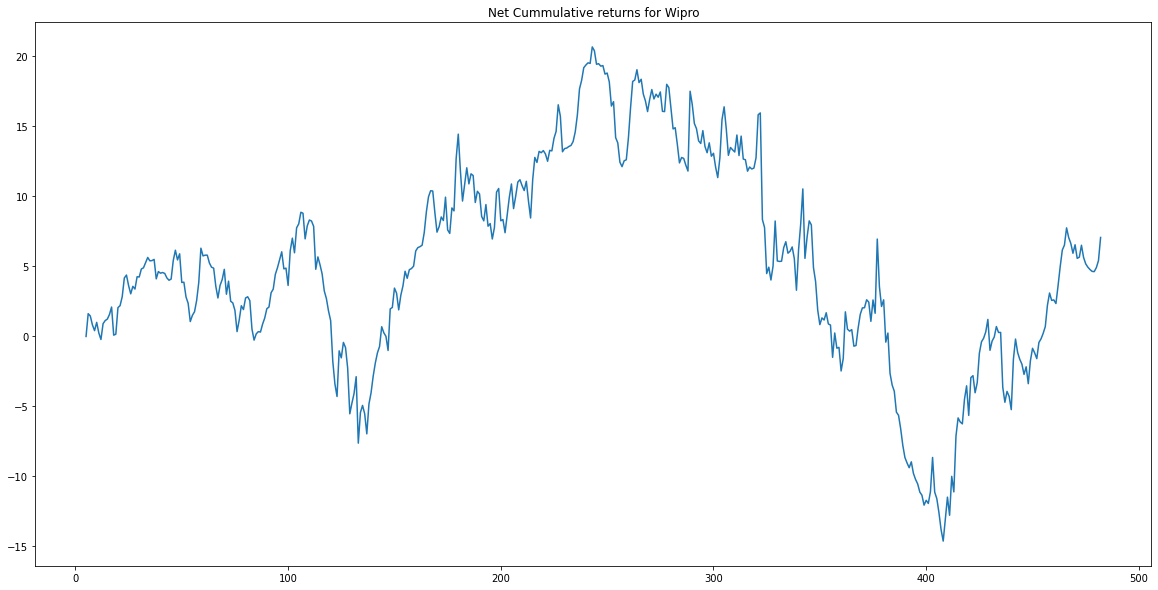

In [91]:
wipro_data['Net Cummulative Returns'] = (((wipro_data['Open Price'] - wipro_data['Close Price'])/(wipro_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(wipro_data['Net Cummulative Returns'])
plt.title('Net Cummulative returns for Wipro')